In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [3]:
path = r'D:\Learn_Bay_Deployment\diabetes.csv'
dataset = pd.read_csv(path)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check Missing Values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
for i in dataset.columns:
    print('*'*30,i,'*'*30)
    print()
    print(set(dataset[i].unique()))
    print()

****************************** Pregnancies ******************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

****************************** Glucose ******************************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

****************************** BloodPressure ******************************

{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


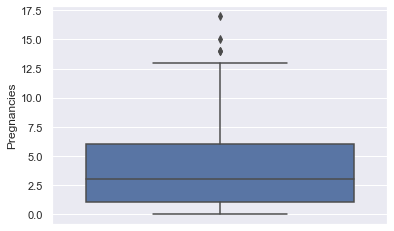

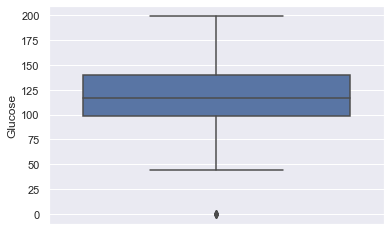

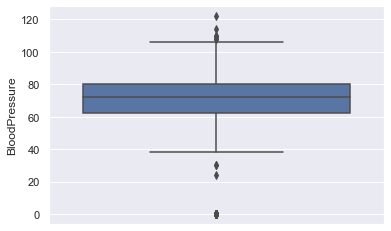

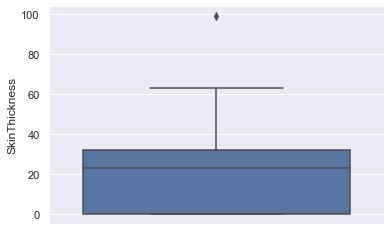

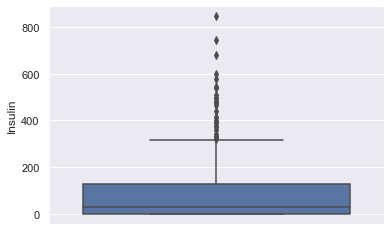

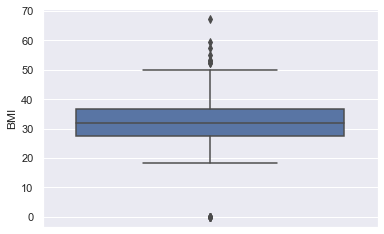

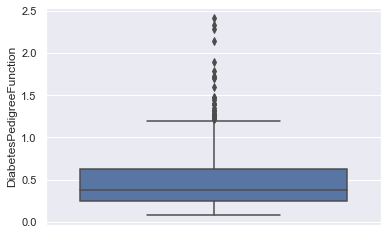

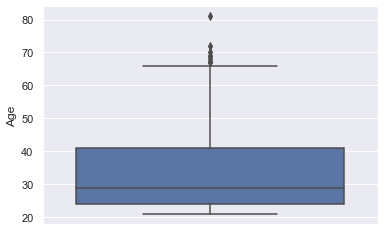

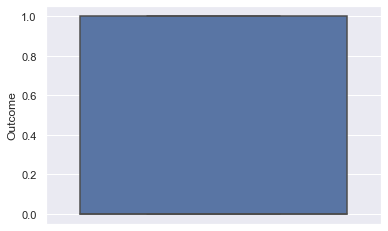

In [10]:
def boxplots(col):
    sns.boxplot(y=dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude='object').columns)[0:]:
    boxplots(i)

In [11]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,dataset['Glucose'].median(),dataset['Glucose'])
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,dataset['BloodPressure'].median(),dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,dataset['SkinThickness'].median(),dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,dataset['Insulin'].median(),dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,dataset['BMI'].median(),dataset['BMI'])

In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
dataset['Outcome'].value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [17]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [16]:
# Balance The Data by Using SMOTE

from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X,Y)
print("Before Balancing :\n",Y.value_counts())
print()
print("After Balancing :\n",Y_smote.value_counts())

Before Balancing :
 0    500
1    268
Name: Outcome, dtype: int64

After Balancing :
 1    500
0    500
Name: Outcome, dtype: int64


In [19]:
# Split the data into Training and Testing For Model Building :
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state=1, stratify=Y_smote)

# Bagging Classifier Model

### Model Building :

In [20]:
bagging = BaggingClassifier()
bagging.fit(X_train, Y_train)

BaggingClassifier()

### Prediction :

In [21]:
Y_pred_bagging_train = bagging.predict(X_train)
Y_pred_bagging_test = bagging.predict(X_test)

### Evaluation Of Model :

In [22]:
print(f'Training Classification Report :\n{classification_report(Y_train, Y_pred_bagging_train)}')
print()
print(f'Test Classification Report :\n{classification_report(Y_test, Y_pred_bagging_test)}')

Training Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       375
           1       0.99      0.98      0.99       375

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       125
           1       0.77      0.74      0.75       125

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



In [23]:
print(f'Training Confusion Matrix :\n{confusion_matrix(Y_train, Y_pred_bagging_train)}')
print()
print(f'Test Confusion Matrix :\n{confusion_matrix(Y_test, Y_pred_bagging_test)}')

Training Confusion Matrix :
[[372   3]
 [  8 367]]

Test Confusion Matrix :
[[97 28]
 [33 92]]


In [25]:
print(f'Training Accuracy : {round(accuracy_score(Y_train, Y_pred_bagging_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test, Y_pred_bagging_test), 2)}')

Training Accuracy : 0.99

Test Accuracy : 0.76


In [29]:
from sklearn.tree import plot_tree

In [30]:
bagging.estimators_

[DecisionTreeClassifier(random_state=2007351697),
 DecisionTreeClassifier(random_state=1302055357),
 DecisionTreeClassifier(random_state=345254940),
 DecisionTreeClassifier(random_state=223727278),
 DecisionTreeClassifier(random_state=2145460370),
 DecisionTreeClassifier(random_state=2068383615),
 DecisionTreeClassifier(random_state=1666867597),
 DecisionTreeClassifier(random_state=1403154163),
 DecisionTreeClassifier(random_state=1309836300),
 DecisionTreeClassifier(random_state=1740644445)]

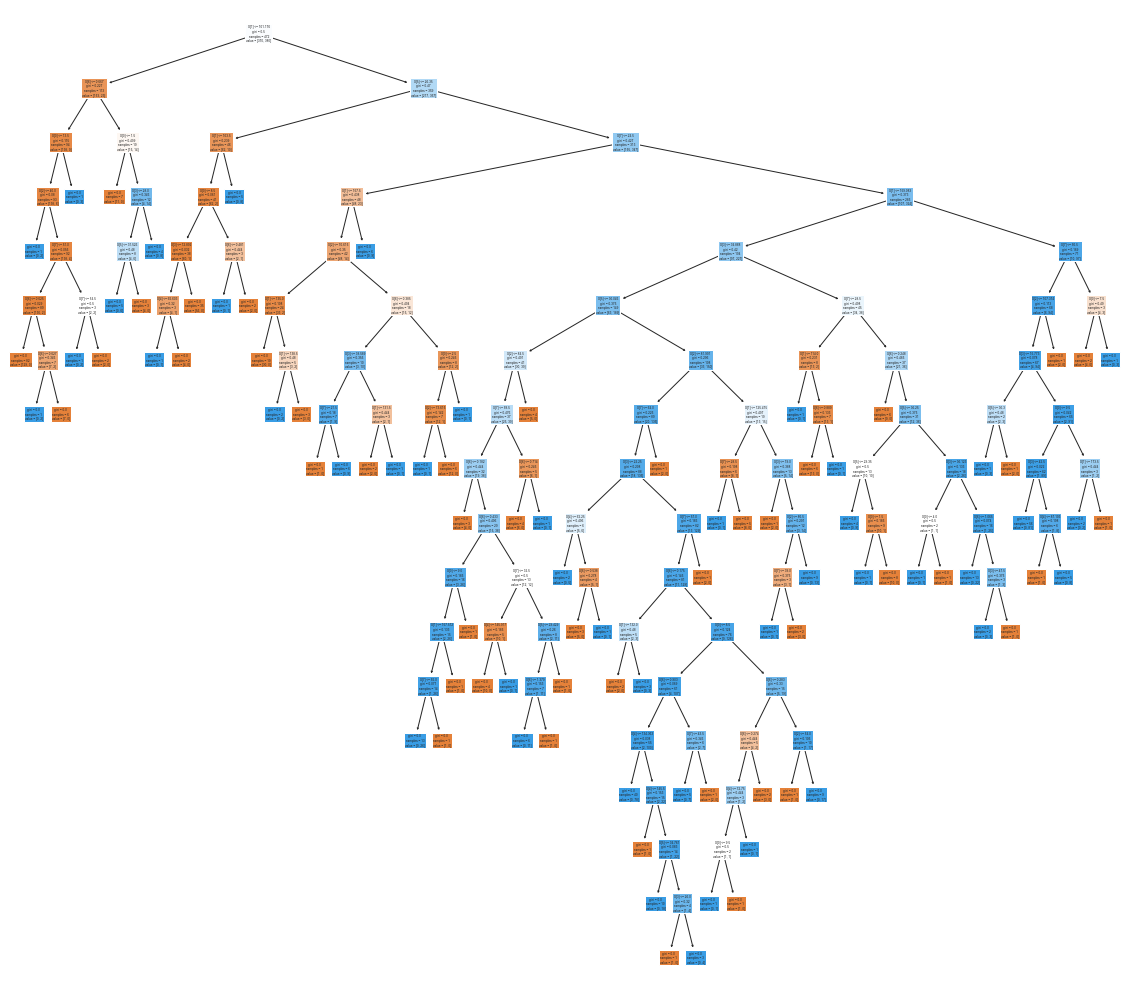

In [31]:
plt.figure(figsize=(20,18))
plot_tree(bagging.estimators_[0],filled=True)
plt.show()

# Random Forest :

### Model Building :

In [26]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

### Prediction :

In [27]:
Y_pred_RF_train = RF.predict(X_train)
Y_pred_RF_test = RF.predict(X_test)

### Evaluation Of Model :

In [28]:
print(f'Training Classification Report :\n{classification_report(Y_train, Y_pred_RF_train)}')
print()
print(f'Test Classification Report :\n{classification_report(Y_test, Y_pred_RF_test)}')

Training Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       125
           1       0.78      0.82      0.80       125

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [32]:
print(f'Training Confusion Matrix :\n{confusion_matrix(Y_train, Y_pred_RF_train)}')
print()
print(f'Test Confusion Matrix :\n{confusion_matrix(Y_test, Y_pred_RF_test)}')

Training Confusion Matrix :
[[375   0]
 [  0 375]]

Test Confusion Matrix :
[[ 96  29]
 [ 23 102]]


In [33]:
print(f'Training Accuracy : {round(accuracy_score(Y_train, Y_pred_RF_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test, Y_pred_RF_test), 2)}')

Training Accuracy : 1.0

Test Accuracy : 0.79


In [63]:
RF_1 = RandomForestClassifier(criterion='gini', max_features=4, max_depth=4,n_estimators=250, oob_score=True )
RF_1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=4, n_estimators=250,
                       oob_score=True)

In [64]:
Y_pred_RF1_train = RF_1.predict(X_train)
Y_pred_RF1_test = RF_1.predict(X_test)

In [65]:
print(f'Training Classification Report :\n{classification_report(Y_train, Y_pred_RF1_train)}')
print()
print(f'Test Classification Report :\n{classification_report(Y_test, Y_pred_RF1_test)}')

Training Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       375
           1       0.80      0.89      0.84       375

    accuracy                           0.83       750
   macro avg       0.84      0.83      0.83       750
weighted avg       0.84      0.83      0.83       750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       125
           1       0.72      0.84      0.78       125

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250



In [66]:
print(f'Training Accuracy : {round(accuracy_score(Y_train, Y_pred_RF1_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test, Y_pred_RF1_test), 2)}')

Training Accuracy : 0.83

Test Accuracy : 0.76


In [70]:
RF_1.feature_importances_

array([0.0340375 , 0.42300587, 0.02849295, 0.02204507, 0.02393692,
       0.20352559, 0.07424849, 0.19070762])

In [71]:
RF_1.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [72]:
feature_df = pd.DataFrame({'Feature':RF_1.feature_names_in_,'Feature_Importance':RF_1.feature_importances_})
feature_df

,Feature,Feature_Importance
0,Pregnancies,0.034037
1,Glucose,0.423006
2,BloodPressure,0.028493
3,SkinThickness,0.022045
4,Insulin,0.023937
5,BMI,0.203526
6,DiabetesPedigreeFunction,0.074248
7,Age,0.190708


In [53]:
# Cross Validation
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(RF_1, X_test, Y_test, cv=10)
test_accuracy

array([0.76, 0.92, 0.8 , 0.64, 0.8 , 0.8 , 0.76, 0.76, 0.84, 0.76])

In [54]:
print("Test Mean Accuracy : ",test_accuracy.mean())
print()
print("Test Max Accuracy : ",test_accuracy.max())

Test Mean Accuracy :  0.784

Test Max Accuracy :  0.92


In [67]:
# Approach No 2 : Building Model With Scaled Data and without Balancing
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [73]:
X_train_Scaled, X_test_Scaled, Y_train_Scaled, Y_test_Scaled=train_test_split(X_Scaled, Y, test_size=0.25, random_state=1, stratify=Y)

In [82]:
RF_2 = RandomForestClassifier(criterion='gini', max_features=4, max_depth=4)
RF_2.fit(X_train_Scaled, Y_train_Scaled)

RandomForestClassifier(max_depth=4, max_features=4)

In [83]:
Y_pred_RF2_train = RF_2.predict(X_train_Scaled)
Y_pred_RF2_test = RF_2.predict(X_test_Scaled)

In [84]:
print(f'Training Accuracy : {round(accuracy_score(Y_train_Scaled, Y_pred_RF2_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test_Scaled, Y_pred_RF2_test), 2)}')

Training Accuracy : 0.84

Test Accuracy : 0.73


In [78]:
RF_2.feature_importances_

array([0.08063823, 0.25842309, 0.08336278, 0.06546139, 0.07946764,
       0.15438942, 0.12973391, 0.14852355])

In [85]:
test_accuracy = cross_val_score(RF_2, X_test_Scaled, Y_test_Scaled, cv=10)
test_accuracy

array([0.85      , 0.55      , 0.84210526, 0.68421053, 0.73684211,
       0.84210526, 0.68421053, 0.84210526, 0.47368421, 0.78947368])

In [86]:
print("Test Mean Accuracy : ",test_accuracy.mean())
print()
print("Test Max Accuracy : ",test_accuracy.max())

Test Mean Accuracy :  0.7294736842105263

Test Max Accuracy :  0.85


# Logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression 

In [91]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [92]:
Y_pred_LR_train = LR.predict(X_train)
Y_pred_LR_test = LR.predict(X_test)

In [93]:
print(f'Training Accuracy : {round(accuracy_score(Y_train, Y_pred_LR_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test, Y_pred_LR_test), 2)}')

Training Accuracy : 0.73

Test Accuracy : 0.76


# Decision Tree :

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [101]:
Y_pred_DT_train = DT.predict(X_train)
Y_pred_DT_test = DT.predict(X_test)

In [102]:
print(f'Training Accuracy : {round(accuracy_score(Y_train, Y_pred_DT_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test, Y_pred_DT_test), 2)}')

Training Accuracy : 1.0

Test Accuracy : 0.72


# Voting Ensemble Method :

In [103]:
from sklearn.ensemble import VotingClassifier

In [116]:
evc = VotingClassifier(estimators=[('bagging',bagging),('RF_1',RF_1),
                                   ('LR',LR)], voting='soft')
model_evc = evc.fit(X_train,Y_train)

In [117]:
Y_pred_evc_train = evc.predict(X_train)
Y_pred_evc_test = evc.predict(X_test)

In [118]:
print(f'Training Accuracy : {round(accuracy_score(Y_train, Y_pred_evc_train), 2)}')
print()
print(f'Test Accuracy : {round(accuracy_score(Y_test, Y_pred_evc_test), 2)}')

Training Accuracy : 0.92

Test Accuracy : 0.78


In [120]:
test_accuracy = cross_val_score(evc, X_test, Y_test, cv=10)

In [121]:
print("Test Mean Accuracy : ",test_accuracy.mean())
print()
print("Test Max Accuracy : ",test_accuracy.max())

Test Mean Accuracy :  0.772

Test Max Accuracy :  0.84


In [122]:
bagging_accuracy = round(accuracy_score(Y_test, Y_pred_bagging_test), 2)
rf_accuracy = round(accuracy_score(Y_test, Y_pred_RF1_test), 2)
logistic_accuracy = round(accuracy_score(Y_test, Y_pred_LR_test), 2)
voting_accuracy = round(accuracy_score(Y_test, Y_pred_evc_test), 2)

In [124]:
list1 = ['Bagging','RandomForest','Logistic','Voting']
list2 = [bagging_accuracy, rf_accuracy, logistic_accuracy,voting_accuracy]
final_accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
final_accuracy

,Method Used,Accuracy
0,Bagging,0.76
1,RandomForest,0.76
2,Logistic,0.76
3,Voting,0.78


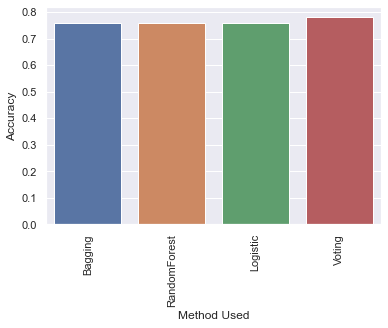

In [127]:
chart = sns.barplot(x='Method Used', y='Accuracy', data=final_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# print(chart)
plt.show()